# 2D lists and plots

In this session we explore 2D lists and their plots. These are useful when you start working on numerical methods in the engineering courses.

As an illustration, we create a 2D list that has values depending on two Gaussian functions - one positive and one negative - both offset from eachother to create a hill and a valley appearance.

First we create two lists that contain the distance variables for the x-axis and y-axis. We choose to have about 25 values along each direction.

In [1]:
x = list(map(lambda a: a*0.4, list(range(0,25,1))))

In [2]:
y = x[:]

We need the math module to use the exponential function.

In [3]:
import math

We define a function that returns the value as per the Gaussian function. The parameters are the origin (x0, y0) and the standard deviation sd.

In [4]:
def gauss(x, y, x0, y0, sd):
    r = (x-x0)**2 + (y-y0)**2;
    return math.exp(-(r/sd)**2)

We import the numpy module to use ndarrays.

In [5]:
import numpy as np

We create an empty 2D array.

In [6]:
z = np.zeros([25, 25])

In [7]:
for i in range(0,25,1):
    for j in range(0,25,1):
        z[i,j] = gauss(x[i], y[j], 2.5, 2.5, 4) + gauss(x[i], y[j], 7.5, 7.5, 2)

We now import the plotting module.

In [8]:
% matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'A hill and a valley')

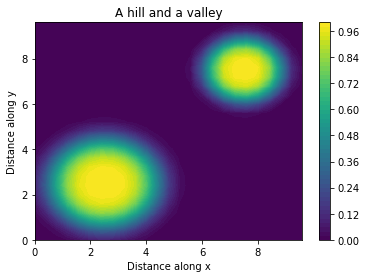

In [9]:
plt.contourf(x,y,z, 50)
plt.colorbar()
plt.xlabel('Distance along x')
plt.ylabel('Distance along y')
plt.title('A hill and a valley')

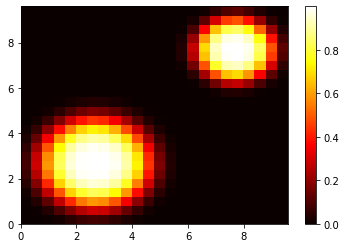

In [10]:
fig1 = plt.pcolormesh(x,y,z, cmap='hot')
plt.colorbar()

## Quiver plots

We can use quiver plots to show arrows that indicate the direction of graident (slope) of the variable in 2D space. We need to create two arrays that store the gradient components along x and y directions. We can use central difference to evaluate the gradients.

In [11]:
gx = np.zeros([24, 24]);
gy = np.zeros([24, 24]);

for i in range(2,24,1):
    for j in range(2,24,1):
        gx[i,j] = z[i+1,j] - z[i-1,j];
        gy[i,j] = z[i,j+1] - z[i, j-1];

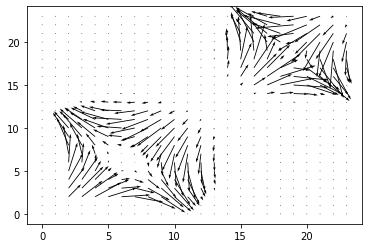

In [12]:
fig2 = plt.quiver(gx, gy)

## Superposing contour maps with quiver plots

We can superpose plots and see the variation of the parameter along z in a more intuitive manner.

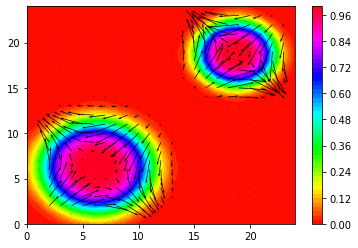

In [13]:
plt.contourf(z, 50, cmap='hsv')
plt.colorbar()
plt.quiver(gx,gy)

In [14]:
from mpl_toolkits.mplot3d import Axes3D

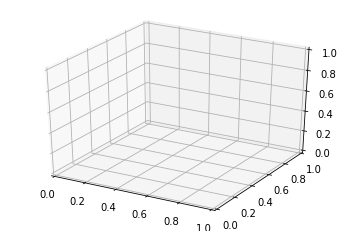

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

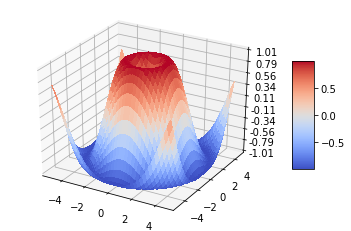

In [16]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()